In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
# Scrape a single match shots
base_url = 'https://understat.com/match/'
# Type the match id
#match = str(input('Please enter the match id: '))
match = '15762' 
url = base_url+match

In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts = soup.find_all('script')

In [4]:
#get only the shotsData
strings = scripts[1].string

In [5]:
strings[0:1000]

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22419270\\x22,\\x22minute\\x22\\x3A\\x225\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.75\\x22,\\x22Y\\x22\\x3A\\x220.49700000762939456\\x22,\\x22xG\\x22\\x3A\\x220.022413481026887894\\x22,\\x22player\\x22\\x3A\\x22Jens\\x20Stryger\\x20Larsen\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x226262\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222020\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2215762\\x22,\\x22h_team\\x22\\x3A\\x22Udinese\\x22,\\x22a_team\\x22\\x3A\\x22Juventus\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222021\\x2D05\\x2D02\\x2016\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Roberto\\x20Pereyra\\x22,\\x22lastAction\\x22\\x3A\\x22BallTouch\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22419271\\x22,\\x22minute\\x22\\x3A\\x229\\x22,\\x22result\\x

In [6]:
# Strip unnecessary symbols and get only JSON data 
str_start = strings.index("('")+2 
str_end = strings.index("')") 
json_data = strings[str_start:str_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to JSON
data = json.loads(json_data)

In [7]:
# The JSON consists of home (h) and away (a) objects

data['h'][0]

{'id': '419270',
 'minute': '5',
 'result': 'SavedShot',
 'X': '0.75',
 'Y': '0.49700000762939456',
 'xG': '0.022413481026887894',
 'player': 'Jens Stryger Larsen',
 'h_a': 'h',
 'player_id': '6262',
 'situation': 'OpenPlay',
 'season': '2020',
 'shotType': 'RightFoot',
 'match_id': '15762',
 'h_team': 'Udinese',
 'a_team': 'Juventus',
 'h_goals': '1',
 'a_goals': '2',
 'date': '2021-05-02 16:00:00',
 'player_assisted': 'Roberto Pereyra',
 'lastAction': 'BallTouch'}

In [8]:
# The JSON consists of home (h) and away (a) objects

data['a'][0]

{'id': '419272',
 'minute': '26',
 'result': 'BlockedShot',
 'X': '0.740999984741211',
 'Y': '0.36',
 'xG': '0.016800951212644577',
 'player': 'Rodrigo Bentancur',
 'h_a': 'a',
 'player_id': '6108',
 'situation': 'OpenPlay',
 'season': '2020',
 'shotType': 'LeftFoot',
 'match_id': '15762',
 'h_team': 'Udinese',
 'a_team': 'Juventus',
 'h_goals': '1',
 'a_goals': '2',
 'date': '2021-05-02 16:00:00',
 'player_assisted': 'Juan Cuadrado',
 'lastAction': 'Pass'}

In [9]:
# Separate home and away teams into different DataFrames

from pandas import json_normalize

data_all = json_normalize(data, sep = "_")
data_home = json_normalize(data['h'], sep = "_")
data_away = json_normalize(data['a'], sep = "_")

In [10]:
data_away.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,419272,26,BlockedShot,0.740999984741211,0.36,0.016800951212644577,Rodrigo Bentancur,a,6108,OpenPlay,2020,LeftFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Juan Cuadrado,Pass
1,419273,26,MissedShots,0.9459999847412109,0.5279999923706055,0.43400445580482483,Weston McKennie,a,5360,FromCorner,2020,Head,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Juan Cuadrado,Cross
2,419274,33,SavedShot,0.7930000305175782,0.3820000076293945,0.03271253779530525,Paulo Dybala,a,1294,OpenPlay,2020,RightFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Rodrigo Bentancur,Pass
3,419275,36,BlockedShot,0.8680000305175781,0.40700000762939453,0.03047754615545273,Matthijs de Ligt,a,7902,SetPiece,2020,LeftFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,None,Aerial
4,419276,36,MissedShots,0.9669999694824218,0.46700000762939453,0.6311620473861694,Cristiano Ronaldo,a,2371,SetPiece,2020,Head,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Matthijs de Ligt,Cross


In [11]:
#df['cum_away_shots'] = df['away_shots'].cumsum()
#df["A"] = pd.to_numeric(df["A"], downcast="float")

#Converting from string to float
data_home['xG'] = pd.to_numeric(data_home['xG'], downcast="float")
data_away['xG'] = pd.to_numeric(data_away['xG'], downcast="float")

#Converting from string to int
data_home['minute'] = pd.to_numeric(data_home['minute'], downcast="integer")
data_away['minute'] = pd.to_numeric(data_away['minute'], downcast="integer")

#Getting a column with cumulative result
data_home['cumsum_xg'] = data_home['xG'].cumsum()
data_away['cumsum_xg'] = data_away['xG'].cumsum()

In [12]:
data_home.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,419270,5,SavedShot,0.75,0.49700000762939456,0.022413,Jens Stryger Larsen,h,6262,OpenPlay,...,RightFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Roberto Pereyra,BallTouch,0.022413
1,419271,9,Goal,0.9359999847412109,0.33799999237060546,0.053117,Nahuel Molina,h,8963,SetPiece,...,RightFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Rodrigo de Paul,Foul,0.075531
2,419278,47,BlockedShot,0.700999984741211,0.47400001525878904,0.020147,Rodrigo de Paul,h,1145,OpenPlay,...,RightFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Bram Nuytinck,Pass,0.095678
3,419279,51,MissedShots,0.865,0.6519999694824219,0.102520,Tolgay Arslan,h,4348,OpenPlay,...,LeftFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,None,TakeOn,0.198197
4,419283,61,BlockedShot,0.899000015258789,0.5279999923706055,0.023644,Stefano Okaka,h,1763,FromCorner,...,Head,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Rodrigo de Paul,Aerial,0.221842


In [13]:
data_away.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,419272,26,BlockedShot,0.740999984741211,0.36,0.016801,Rodrigo Bentancur,a,6108,OpenPlay,...,LeftFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Juan Cuadrado,Pass,0.016801
1,419273,26,MissedShots,0.9459999847412109,0.5279999923706055,0.434004,Weston McKennie,a,5360,FromCorner,...,Head,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Juan Cuadrado,Cross,0.450805
2,419274,33,SavedShot,0.7930000305175782,0.3820000076293945,0.032713,Paulo Dybala,a,1294,OpenPlay,...,RightFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Rodrigo Bentancur,Pass,0.483518
3,419275,36,BlockedShot,0.8680000305175781,0.40700000762939453,0.030478,Matthijs de Ligt,a,7902,SetPiece,...,LeftFoot,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,None,Aerial,0.513995
4,419276,36,MissedShots,0.9669999694824218,0.46700000762939453,0.631162,Cristiano Ronaldo,a,2371,SetPiece,...,Head,15762,Udinese,Juventus,1,2,2021-05-02 16:00:00,Matthijs de Ligt,Cross,1.145158


In [14]:
# Creating a df with the data we need only
home_df = data_home[['minute', 'cumsum_xg']]
away_df = data_away[['minute', 'cumsum_xg']]

# Creating objects for home/away minutes and xG
# Setting the 1st elements to zero, so the step chart start from zero position in both teams
h_min = [0]
a_min = [0]
h_xg = [0.0]
a_xg = [0.0]

# Adding to the lists above all the minutes and xG for home team
for x in range(len(home_df['minute'])):
    h_xg.append(home_df['cumsum_xg'].iloc[x])
    h_min.append(home_df['minute'].iloc[x])

# Adding to the lists above all the minutes and xG for away team
for x in range(len(away_df['minute'])):
    a_xg.append(away_df['cumsum_xg'].iloc[x])
    a_min.append(away_df['minute'].iloc[x])


In [15]:
a_xg, a_min

([0.0,
  0.016800951,
  0.4508054,
  0.48351794,
  0.51399547,
  1.1451576,
  1.168835,
  1.1978265,
  1.2629731,
  1.2866435,
  1.3451693,
  1.4242022,
  1.4767786,
  2.2380774,
  2.7942543],
 [0, 26, 26, 33, 36, 36, 40, 53, 55, 58, 62, 79, 81, 82, 88])

Text(0.5, 1.0, 'Udinese (white) vs Juventus (red) 1:2')

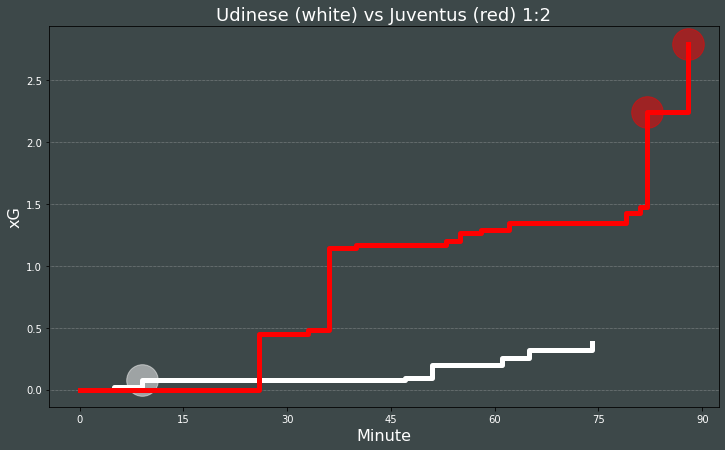

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

plt.xticks([0,15,30,45,60,75,90], color='white')
plt.yticks(color='white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)

'''
#plot the step graphs
ax.step(x=data_home['minute'],y=data_home['cumsum_xg'],color='white',linewidth=5)
ax.step(x=data_away['minute'],y=data_away['cumsum_xg'],color='red',linewidth=5)
'''

# Passing our lists to step object to plot the chart
ax.step(x=h_min,y=h_xg,color='white',linewidth=5, where='post')
ax.step(x=a_min,y=a_xg,color='red',linewidth=5, where='post') #check the where option

# Displaying scatter plots when goals were scored for home team
for i in range(len(data_home['id'])):
    if data_home.iloc[i]['result'] == 'Goal':
        ax.scatter(data_home.iloc[i]['minute'], data_home.iloc[i]['cumsum_xg'], color='white', s=1000, marker='o', alpha=0.5)

# Displaying scatter plots when goals were scored for away team
for i in range(len(data_away['id'])):
    if data_away.iloc[i]['result'] == 'Goal':
        ax.scatter(data_away.iloc[i]['minute'], data_away.iloc[i]['cumsum_xg'], color='red', s=1000, marker='o', alpha=0.5)

plt.title(data_home.iloc[0]['h_team'] + ' (white) vs ' + data_home.iloc[0]['a_team'] + ' (red) ' +\
          str(data_home.iloc[0]['h_goals']) + ':' + str(data_away.iloc[0]['a_goals']), color='white', fontsize=18)

#plt.step(h_min, h_xg)
#plt.step(a_min, a_xg)